In [19]:
import sys
import os
dir = os.path.abspath('')
while not dir.endswith('ardt'): dir = os.path.dirname(dir)
if not dir in sys.path: sys.path.append(dir)

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from datasets import load_dataset, load_from_disk
from huggingface_hub import login

from utils.helpers import find_root_dir

from access_tokens import HF_WRITE_TOKEN

In [21]:
ARDT_DIR = find_root_dir()

dataset_dirname = "datasets"
dataset_filename = "ppo_randadv_eval_halfcheetah_filtered"

In [22]:
dataset = load_from_disk(f"{ARDT_DIR}/{dataset_dirname}/{dataset_filename}")

# login(token=HF_WRITE_TOKEN)
# dataset = load_dataset(f"afonsosamarques/{dataset_name}")

dataset

Dataset({
    features: ['observations', 'pr_actions', 'adv_actions', 'rewards', 'dones', 'returns'],
    num_rows: 1000
})

In [23]:
# dataset = dataset.select(range(1000, 2000))

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

/Users/afonsosamarques/.virtualenvs/fp-adt/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


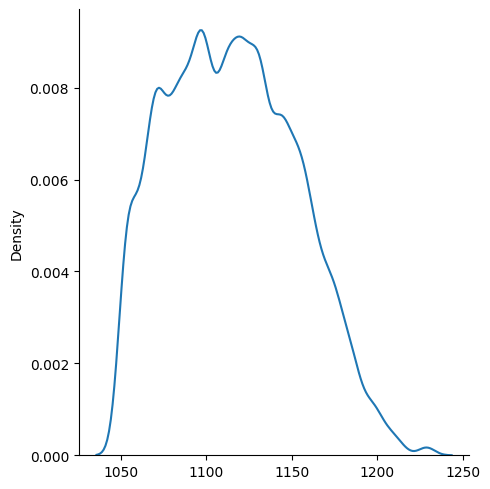

In [24]:
def compute_sum(ds):
    return {'returns': sum(ds['rewards'])}

ds_to_vis = dataset.map(compute_sum)
sns.displot(ds_to_vis['returns'], kind="kde", bw_adjust=0.5);

In [ ]:
pr_actions = np.array(dataset['pr_actions'])
for i in range(pr_actions.shape[2]):
    print("===============================")
    # print("Action dimension: ", i+1)
    # print("Min:", np.min(pr_actions[:, :, i]))
    # print("Median:", np.median(pr_actions[:, :, i]))
    # print("Max:", np.max(pr_actions[:, :, i]))
    # print("Mean:", np.mean(pr_actions[:, :, i]))
    plt.figure()
    sns.displot(pr_actions[:, :, i].reshape(-1, 1).squeeze())
    plt.show();

In [ ]:
adv_actions = np.array(dataset['adv_actions'])
for i in range(adv_actions.shape[2]):
    print("===============================")
    # print("Action dimension: ", i+1)
    # print("Min:", np.min(adv_actions[:, :, i]))
    # print("Median:", np.median(adv_actions[:, :, i]))
    # print("Max:", np.max(adv_actions[:, :, i]))
    # print("Mean:", np.mean(adv_actions[:, :, i]))
    plt.figure()
    sns.displot(adv_actions[:, :, i].reshape(-1, 1).squeeze())
    plt.show();